In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: *Null hypothesis: the lady is not able to tell at all which is which, a random guess would have been just as accurate*
     
hypothesis: the lady was able to tell whether milk or tea went in first more times than not. (one sided)

Step 2: Our statistic, X, will be the number of cups that were correctly identified out of 8. Note that this can only be an even number, but this is taken care of in our simulation.

Step 3: the p-value is the probability that she could get 6 correct out of 8 if she were just guessing.

We know that there are 4 cups of tea first and 4 not, so there is a 50-50 chance that a cup is one or the other. We could use this in a hypergeometric, but we will simulate. 

Let's do a simulation: randomly shuffle a guess against a list of correct answers

In [2]:
Guess = ['M', 'M', 'M', 'M','T','T','T','T']
T = []

for n in np.arange(10000):
    T = np.append(T,sum(np.random.choice(Guess,8,replace=False)==Guess))

p = sum(T == 6)/10000 + sum(T==8)/10000
p

0.2394

Step 4: The probability that she would randomly guess 6 or more cups of tea correctly is about 24%. We fail to reject our null hypothesis because there is a significant probability that we would acquire our data if she were purely guessing.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [3]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null hypothesis: The average sepal width of virginica is equal to or less than the average sepal width of versicolor.

Alternative hypothesis: The average sepal width of virginica is greater than the average sepal width of versicolor.

Step 2: The test statistic will be the difference between average sepal width of the two species from our sample.

Step 3: obs is the observed value of the difference between the averages of the sepal sizes. Our p value is the probability that, given our null was true, we would observe the difference we did or larger. The greatest p value will occur when the average sepal sizes are equal.



In [4]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs #This is the mean size of virginica minus the mean size of versicolor

0.20399999999999974

In [5]:
#This is the bootstrap method, and it just shows that the average of the sample is about the average of the sample.

Diff_Av = []

for n in np.arange(10000):
    virg_sam = np.random.choice(iris_sub.where(0,'virginica').column(1),len(iris_sub.where(0,'virginica').column(1)))
    vers_sam = np.random.choice(iris_sub.where(0,'versicolor').column(1),len(iris_sub.where(0,'versicolor').column(1)))
    Diff_Av = np.append(Diff_Av,np.mean(virg_sam)-np.mean(vers_sam))
    
   
p = sum(Diff_Av>=0.204)/10000
p

0.5021

C:\Users\C20John.Wirth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


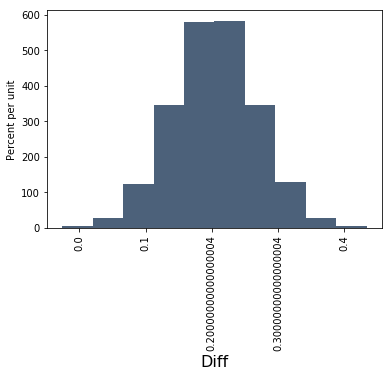

In [7]:
Table().with_column('Diff',Diff_Av).hist() 

In [10]:
#I will retry to Bootstrap something. Our underlying assumption for the null is that there is no difference between
#the average of the two sepal widths. So I will randomly sample from the same flower to see what the spread should be.

Diff_Av = []

for n in np.arange(10000):
    virg_sam = np.random.choice(iris_sub.where(0,'virginica').column(1),len(iris_sub.where(0,'virginica').column(1)))
    vers_sam = np.random.choice(iris_sub.where(0,'virginica').column(1),len(iris_sub.where(0,'virginica').column(1)))
    #Since we are drawing from the virginica, our pool will have the same average size
    Diff_Av = np.append(Diff_Av,np.mean(virg_sam)-np.mean(vers_sam))
    
p = sum(Diff_Av>= .2039)/10000
p

0.0014

In [11]:
#I will now repeat the process with the versicolors average as the base average
Diff_Av = []

for n in np.arange(10000):
    virg_sam = np.random.choice(iris_sub.where(0,'versicolor').column(1),len(iris_sub.where(0,'versicolor').column(1)))
    vers_sam = np.random.choice(iris_sub.where(0,'versicolor').column(1),len(iris_sub.where(0,'versicolor').column(1)))
    #Since we are drawing from the versicolor, our pool will have the same average sepal width. This allows us to see how
    #rare it would be to get the difference we did if these flowers actually had the same average width
    Diff_Av = np.append(Diff_Av,np.mean(virg_sam)-np.mean(vers_sam))
    
p = sum(Diff_Av>= .2039)/10000
p

0.0006

In [12]:
#I will now repeat the process with my 'population' as the entire sepal width column, because supposedly they both have
#the same average,
Diff_Av = []

for n in np.arange(10000):
    virg_sam = np.random.choice(iris_sub.column(1),len(iris_sub.column(1)))
    vers_sam = np.random.choice(iris_sub.column(1),len(iris_sub.column(1)))
    Diff_Av = np.append(Diff_Av,np.mean(virg_sam)-np.mean(vers_sam))
    
p = sum(Diff_Av>= .2039)/10000
p


0.0

Step 4: Using all the data available, no possible combination gives any p value close to 5 percent. We conclude that we must reject the null and that the average sepal width of the virginica is greater than that of the versicolor.

Documentation: C2C Coen Williams showed me how he solved this. It made me think to resample from a group which I know 
has the same average. C2C Erik van Hegewald helped me read what Coen did to solve this. 
